# Metrics To Evaluate Machine Learning Algorithms in Python
The metrics that you choose to evaluate your machine learning algorithms are very important.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose.

In this post, you will discover how to select and use different machine learning performance metrics in Python with scikit-learn.

Let’s get started.

## About the Recipes
Various different machine learning evaluation metrics are demonstrated in this post using small code recipes in Python and scikit-learn.

Each recipe is designed to be standalone so that you can copy-and-paste it into your project and use it immediately.

Metrics are demonstrated for both classification and regression type machine learning problems.

For classification metrics, the Pima Indians onset of diabetes dataset is used as demonstration. This is a binary classification problem where all of the input variables are numeric (update: download from here).
For regression metrics, the Boston House Price dataset is used as demonstration. this is a regression problem where all of the input variables are also numeric (update: download data from here).
In each recipe, the dataset is downloaded directly from the UCI Machine Learning repository.

All recipes evaluate the same algorithms, Logistic Regression for classification and Linear Regression for the regression problems. A 10-fold cross-validation test harness is used to demonstrate each metric, because this is the most likely scenario where you will be employing different algorithm evaluation metrics.

A caveat in these recipes is the cross_val_score function used to report the performance in each recipe.It does allow the use of different scoring metrics that will be discussed, but all scores are reported so that they can be sorted in ascending order (largest score is best).

Some evaluation metrics (like mean squared error) are naturally descending scores (the smallest score is best) and as such are reported as negative by the cross_val_score() function. This is important to note, because some scores will be reported as negative that by definition can never be negative.

You can learn more about machine learning algorithm performance metrics supported by scikit-learn on the page Model evaluation: quantifying the quality of predictions.

Let’s get on with the evaluation metrics.

## ==============================
## Part A:  Classification Metrics
## ==============================
Classification problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these problems.

In this section we will review how to use the following metrics:

1. Classification Accuracy.
2. Logarithmic Loss.
3. Area Under ROC Curve.
4. Confusion Matrix.
5. Classification Report.


### 1. Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

Below is an example of calculating classification accuracy.



In [1]:
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy:", results.mean(), results.std())

Accuracy: 0.7695146958304853 0.04841051924567195


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

You can see that the ratio is reported. This can be converted into a percentage by multiplying the value by 100, giving an accuracy score of approximately 77% accurate.

### 2. Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

You can learn more about logarithmic on the Loss functions for classification Wikipedia article.

Below is an example of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes dataset.



In [2]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: ", results.mean(), results.std())

Logloss:  -0.4926551111482703 0.046890273308686774


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the measure is inverted to be ascending when using the cross_val_score() function.

### 3. Area Under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. Learn more about ROC here.

ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

Sensitivity is the true positive rate also called the recall. It is the number instances from the positive (first) class that actually predicted correctly.
Specificity is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly.
You can learn more about ROC on the Wikipedia page.

The example below provides a demonstration of calculating AUC.



In [3]:
# Cross Validation Classification ROC AUC
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC:",results.mean(), results.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

AUC: 0.8234172339945707 0.040708943934478124


You can see the the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions.

### 4. Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.

You can learn more about the Confusion Matrix on the Wikipedia article.

Below is an example of calculating a confusion matrix for a set of prediction by a model on a test set.



In [4]:
# Cross Validation Classification Confusion Matrix
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

### 5. Classification Report
Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The classification_report() function displays the precision, recall, f1-score and support for each class.

The example below demonstrates the report on the binary classification problem.



In [5]:
# Cross Validation Classification Report
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## ==============================
## Part B:  Regression Metrics
## ==============================
In this section will review 3 of the most common metrics for evaluating predictions on regression machine learning problems:

1.  Mean Absolute Error.
2.  Mean Squared Error.
3.  R^2.


### 1. Mean Absolute Error
The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

You can learn more about Mean Absolute error on Wikipedia.

The example below demonstrates calculating mean absolute error on the Boston house price dataset.



In [6]:
# Cross Validation Regression MAE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: ", results.mean(), results.std())

MAE:  -4.004946635323983 2.083599268709537


A value of 0 indicates no error or perfect predictions. Like logloss, this metric is inverted by the cross_val_score() function.

### 2. Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

You can learn more about Mean Squared Error on Wikipedia.

The example below provides a demonstration of calculating mean squared error.



In [7]:
# Cross Validation Regression MSE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: ", results.mean(), results.std())

MSE:  -34.70525594452485 45.57399920030886


This metric too is inverted so that the results are increasing. Remember to take the absolute value before taking the square root if you are interested in calculating the RMSE.

### 3. R^2 Metric
The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively.

You can learn more about the Coefficient of determination article on Wikipedia.

The example below provides a demonstration of calculating the mean R^2 for a set of predictions.



In [8]:
# Cross Validation Regression R^2
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2:", results.mean(), results.std())

R^2: 0.20252899006056846 0.5952960169512226


You can see that the predictions have a poor fit to the actual values with a value close to zero and less than 0.5.

## Summary
In this post, you discovered metrics that you can use to evaluate your machine learning algorithms.

You learned about 3 classification metrics:

Accuracy.
Logarithmic Loss.
Area Under ROC Curve.
Also 2 convenience methods for classification prediction results:

Confusion Matrix.
Classification Report.
And 3 regression metrics:

Mean Absolute Error.
Mean Squared Error.
R^2.
Do you have any questions about metrics for evaluating machine learning algorithms or this post? Ask your question in the comments and I will do my best to answer it.



# ==============================
# Part C:  Clustering Metrics
# ==============================

This is advanced material, if you have time, please continue.  You may also want to help your classmates

## A Quick Review on Clustering:  
Load Wisconsin Breast Cancer Dataset


In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)


(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Partition based Clustering Example


In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=2)
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])


[0 0 0 1 0 1 0 1 1 1]


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)


In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])


Hierarchical Clustering Example


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress=True)

Z = linkage(X, 'ward')
print(Z)


[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


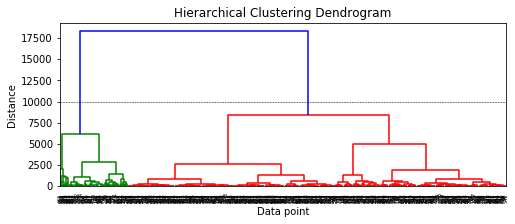

In [14]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()


In [15]:
from scipy.cluster.hierarchy import fcluster

max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')


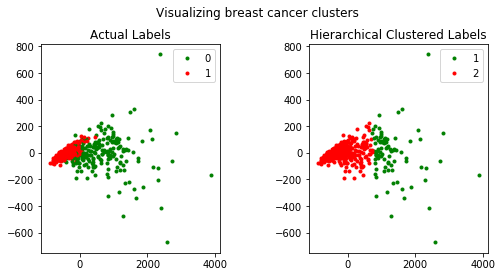

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])


# Clustering Model's Evaluation Metrics
Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric.


Build two clustering models on the breast cancer dataset


In [17]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_


## Homogeneity, Completeness and V-measure

Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

- homogeneity: each cluster contains only members of a single class.
- completeness: all members of a given class are assigned to the same cluster.
- v-measure:   actually equivalent to the mutual information (NMI) discussed above, with the aggregation function being the arithmetic mean [B2011].





In [18]:
from sklearn import datasets, metrics

km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-measure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-measure metrics for num clusters=5: ', km5_hcv)


Homogeneity, Completeness, V-measure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-measure metrics for num clusters=5:  [0.602 0.298 0.398]


### Advantages
Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.
Intuitive interpretation: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.
No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

### Drawbacks
The previously introduced metrics are not normalized with regards to random labeling: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence v-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

This problem can safely be ignored when the number of samples is more than a thousand and the number of clusters is less than 10. For smaller sample sizes or larger number of clusters it is safer to use an adjusted index such as the Adjusted Rand Index (ARI).

## Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient s for a single sample is then given as:

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.




In [19]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)


Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.5102292997907839


### Advantages
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

### Drawbacks
The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

## Calinski-Harabaz Index
If the ground truth labels are not known, the Calinski-Harabaz index (sklearn.metrics.calinski_harabaz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabaz score relates to a model with better defined clusters.

For  clusters, the Calinski-Harabaz score  is given as the ratio of the between-clusters dispersion mean and the within-cluster dispersion:

where  is the between group dispersion matrix and  is the within-cluster dispersion matrix defined by:

with  be the number of points in our data,  be the set of points in cluster ,  be the center of cluster , be the center of ,  be the number of points in cluster .



In [20]:
km2_chi = metrics.calinski_harabaz_score(X, km2_labels)
km5_chi = metrics.calinski_harabaz_score(X, km5_labels)

print('Calinski-Harabaz Index for num clusters=2: ', km2_chi)
print('Calinski-Harabaz Index for num clusters=5: ', km5_chi)


Calinski-Harabaz Index for num clusters=2:  1300.2082268895424
Calinski-Harabaz Index for num clusters=5:  1621.0110530063253


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


### Advantages
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
The score is fast to compute
### Drawbacks
The Calinski-Harabaz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.


# ==============================
# Part D:  Model Tuning
# ==============================

This is an even more advance material.  Proceed with caution.

### Build and Evaluate Default Model
First build a default SVM model

C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided kernel functions and how gamma, coef0 and degree affect each other, see the corresponding section in the narrative documentation: Kernel functions.






In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# prepare datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build default SVM model
def_svc = SVC(random_state=42)
def_svc.fit(X_train, y_train)

# predict and evaluate performance
def_y_pred = def_svc.predict(X_test)
print('Default Model Stats:')

report = classification_report(y_test, def_y_pred)
print(report)

Default Model Stats:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Tune Model with Grid Search
Search through the "paramters" (called hyper-parameters here), we are interested in the kernal being either linear or rbf (radial basis function, which is gaussian).

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use sklearn.model_selection.GridSearchCV with C and gamma spaced exponentially far apart to choose good values.


In [22]:
from sklearn.model_selection import GridSearchCV

# setting the parameter grid
grid_parameters = {'kernel': ['linear', 'rbf'], 
                   'gamma': [1e-3, 1e-4],
                   'C': [1, 10, 50, 100]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)


# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:

0.95226 (+/-0.06310) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.91206 (+/-0.04540) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.95226 (+/-0.06310) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.92462 (+/-0.02338) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.96231 (+/-0.04297) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.90201 (+/-0.04734) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.96231 (+/-0.04297) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.92965 (+/-0.03425) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95729 (+/-0.05989) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.90201 (+/-0.04734) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.95729 (+/-0.05989) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.93467 (+/-0.02975) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95477 (+/-0.05772) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.90201

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)

print('\n\nTuned Model Stats:')

report = classification_report(y_test, tuned_y_pred)
print(report)



Tuned Model Stats:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

